# Ski Resort Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pymysql
import seaborn as sns; sns.set(style="ticks", color_codes=True)

title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
 
axis_bgcolor = '#f0f0f0'


In [3]:
rds_connection_string = "root:<password>@localhost:3306/ski_resorts_db"
engine = create_engine(f'mysql://{rds_connection_string}')

ModuleNotFoundError: No module named 'MySQLdb'

In [4]:
# check for tables
engine.table_names()

NameError: name 'engine' is not defined

In [5]:
# setting variable to reference the csv file
#skiResorts = "Resources/clean_skiResortNortAmerica.csv"
skiResorts = "Resources/clean_skiResortsNA.csv"
# bringing the csv into a pandas dataframe
resorts_df = pd.read_csv(skiResorts)
# convert null / NaN values
resorts_df.fillna("empty", inplace=True)
# printing first five records in the dataframe
resorts_df.head()

,ID,ResortName,Continent,Country,StateProvince,URL,Altitude,Easy,Intermediate,Difficult,Adult,Youth,Child,Currency,ResortSize,SlopeOfferingVariety,LiftsAndCableCars,Latitude,Longitude
0,2131,kettlebowl,North America,USA,Wisconsin,http://www.skiresort.info/ski-resort/kettlebowl/,542,0.3,1.1,0.0,5.0,3.0,2.0,US Dollar,1.3,1.3,1.0,45.271798,-88.901379
1,2599,living-memorial-park-brattleboro,North America,USA,Vermont,http://www.skiresort.info/ski-resort/living-me...,189,0.5,0.0,0.0,5.0,0.0,0.0,US Dollar,1.1,1.0,1.5,42.847999,-72.586477
2,3708,powderhouse-hill-south-berwick,North America,USA,Maine,http://www.skiresort.info/ski-resort/powderhou...,80,0.5,0.0,0.0,5.0,0.0,0.0,US Dollar,1.1,1.0,1.0,43.236673,-70.802367
3,3040,mount-prospect-lancaster,North America,USA,New Hampshire,http://www.skiresort.info/ski-resort/mount-pro...,520,0.5,0.3,0.0,7.0,0.0,5.0,US Dollar,1.2,1.2,1.0,44.453088,-71.558510
4,1900,innisfail,North America,Canada,Alberta,http://www.skiresort.info/ski-resort/innisfail/,955,0.4,0.4,0.0,8.0,0.0,0.0,Canadian Dollar,1.2,1.2,1.0,52.027406,-113.947096


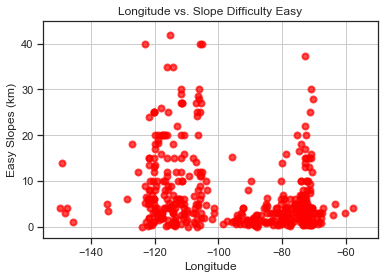

In [32]:
#Scatter plot of Longitude vs. Easy Slope Plot

x_axis = resorts_df['Longitude']
y_axis = resorts_df['Easy']

plt.title('Longitude vs. Slope Difficulty Easy')
plt.axvline(0, color = 'black', alpha = .20)

plt.ylim(-2.5, 45)
plt.xlim(-155,-50)
plt.xlabel('Longitude')
plt.ylabel("Easy Slopes (km)")
    
plt.scatter(x_axis, y_axis, alpha=0.7, c='red', edgecolors='red', linewidths=2 )
plt.grid()

plt.show()


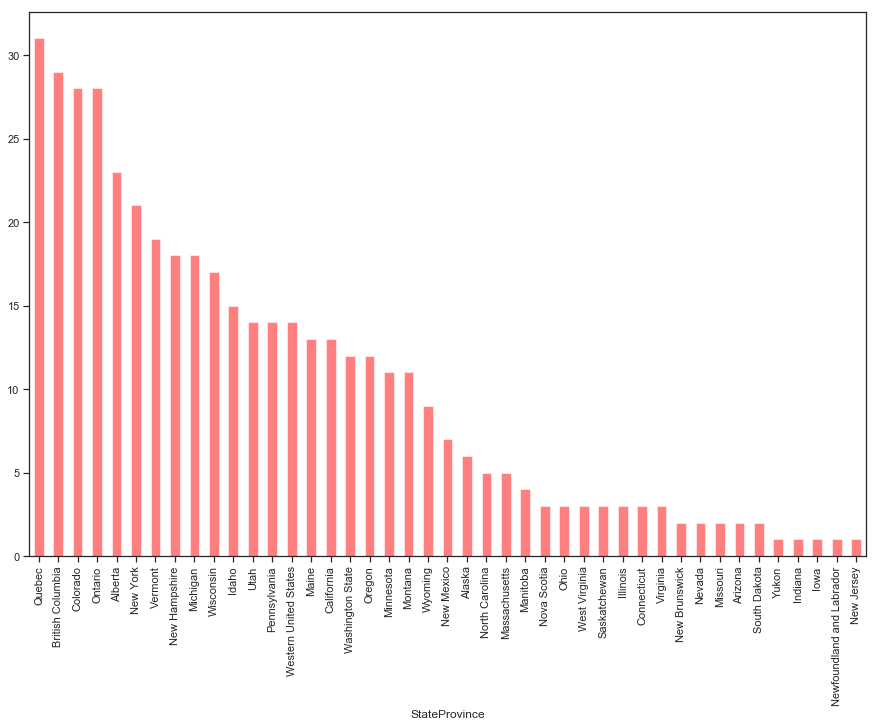

In [6]:
# simple bar chart with number and locations of ski resorts

Locationcounts = resorts_df['StateProvince'].groupby(resorts_df['StateProvince']).count().sort_values(ascending=False)

Locationcounts.plot(kind='bar',figsize=(15, 10), color='red', alpha=0.5);


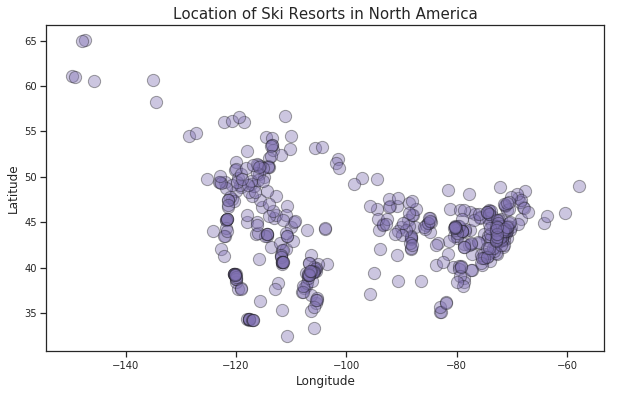

In [17]:
location_index = resorts_df['StateProvince'].value_counts().index
location = pd.DataFrame(resorts_df[resorts_df['StateProvince'].isin(location_index)])
#location.drop_duplicates(subset="StatePovince", keep = False, inplace = True)

# plot the reduced set of coordinate points
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
resorts_df_scatter = ax.scatter(resorts_df['Longitude'], resorts_df['Latitude'], c='m', edgecolor='k', alpha=.4, s=150)

# set axis labels, tick labels, and title
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Location of Ski Resorts in North America', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)
#ax.set_axis_bgcolor(axis_bgcolor)
 
plt.show()
